In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [71]:
df = pd.read_csv("Mall_Customers.csv")
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


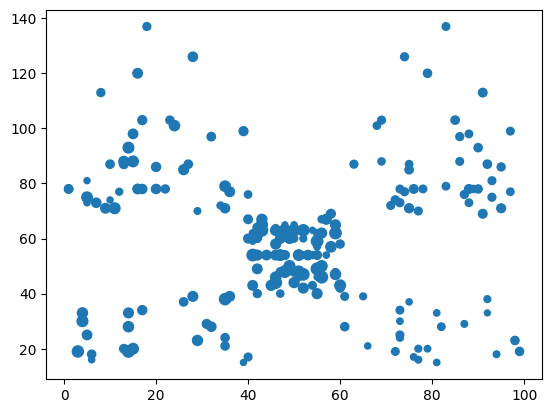

In [72]:
plt.scatter(df["Spending Score (1-100)"], df["Annual Income (k$)"], df["Age"])

In [73]:
k_range = range(1, 11)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(km.inertia_)

sse

[308812.78,
 225180.82535920606,
 143342.751571706,
 104366.15145556198,
 82637.6660919113,
 72114.59130842131,
 52494.6265013142,
 44310.50582506423,
 40849.10926948052,
 37508.94990938068]

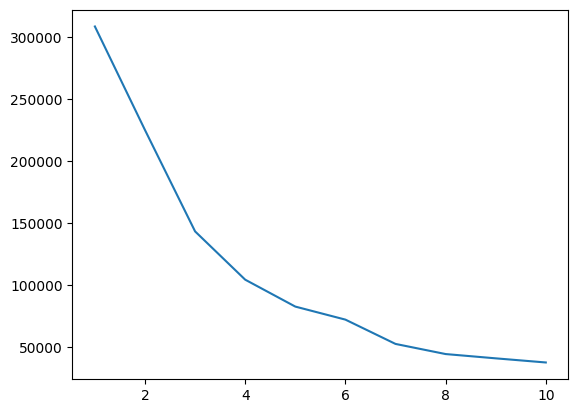

In [74]:
plt.plot(k_range, sse)

In [75]:
km = KMeans(n_clusters=4)
y_predict = km.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
y_predict

array([3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [76]:
df["cluster"] = y_predict
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,1
3,4,0,23,16,77,3
4,5,0,31,17,40,1


C:\Users\am180\AppData\Local\Temp\ipykernel_16292\836342050.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


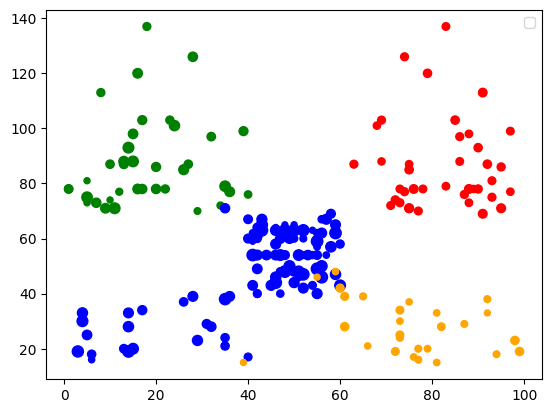

In [77]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]

plt.scatter(df1["Spending Score (1-100)"], df1["Annual Income (k$)"], df1["Age"], color='green')
plt.scatter(df2["Spending Score (1-100)"], df2["Annual Income (k$)"], df2["Age"], color='blue')
plt.scatter(df3["Spending Score (1-100)"], df3["Annual Income (k$)"], df3["Age"], color='red')
plt.scatter(df4["Spending Score (1-100)"], df4["Annual Income (k$)"], df4["Age"], color='orange')

plt.legend()